## Diamonds
### Analyze diamonds by their cut, color, clarity, price, and other attributes

In [2]:
import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt
import sklearn

df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds[df_diamonds.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      int64  
 1   carat       0 non-null      float64
 2   cut         0 non-null      object 
 3   color       0 non-null      object 
 4   clarity     0 non-null      object 
 5   depth       0 non-null      float64
 6   table       0 non-null      float64
 7   price       0 non-null      int64  
 8   x           0 non-null      float64
 9   y           0 non-null      float64
 10  z           0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 0.0+ bytes


In [3]:
df_diamonds.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [4]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Attributes

* ***price*** price in US dollars (\$326--\$18,823)

* ***carat*** weight of the diamond (0.2--5.01)

* ***cut*** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* ***color*** diamond colour, from J (worst) to D (best)

* ***clarity*** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* ***x*** length in mm (0--10.74)

* ***y*** width in mm (0--58.9)

* ***z*** depth in mm (0--31.8)

* ***depth*** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* ***table*** width of top of diamond relative to widest point (43--95)

### Exibi as 10 primeiras linhas do dataset

In [5]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Os ultimos 10 

In [10]:
df_diamonds.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Existe valor nulo

In [11]:
df_diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Type class cut | color | clarity

In [16]:
print('CUT')
print(df_diamonds['cut'].unique())
print('COLOR')
print(df_diamonds['color'].unique())
print('CLARITY')
print(df_diamonds['clarity'].unique())

CUT
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR
['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Analyse Exploratory

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal


<AxesSubplot:>

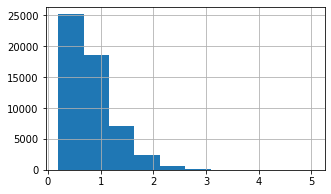

In [17]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3))

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

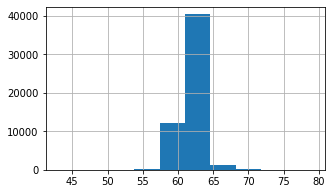

In [18]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed


<AxesSubplot:>

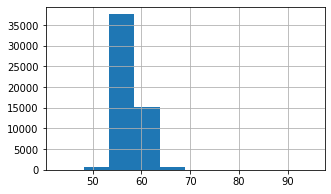

In [19]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

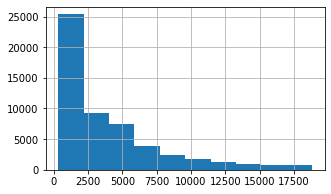

In [20]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3))

Attr: X
Max : 10.74
Min : 0.0
Variance: 1.258347173044451
Std : 1.1217607467924928
mean : 5.731157211716722
median : 5.7
mode: 0    4.37
dtype: float64
1 quartile 25%: 4.71
2 quartile 50%: 5.7
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

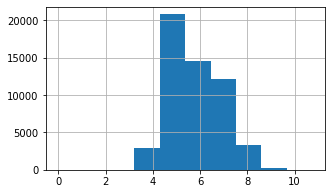

In [21]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

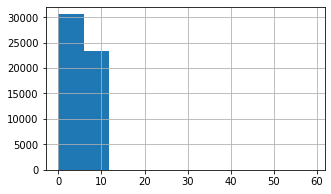

In [22]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

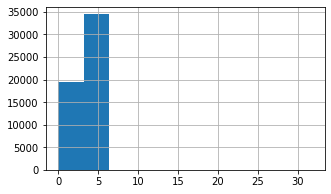

In [23]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

### Boxplot

<AxesSubplot:xlabel='carat'>

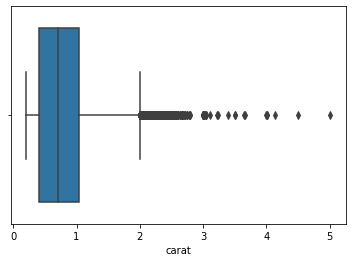

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_diamonds["carat"])

<AxesSubplot:xlabel='depth'>

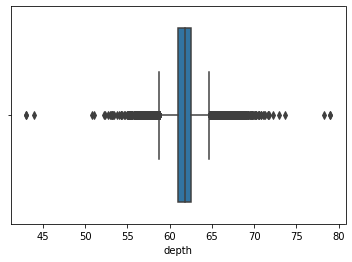

In [27]:
sns.boxplot(x=df_diamonds["depth"])

<AxesSubplot:xlabel='table'>

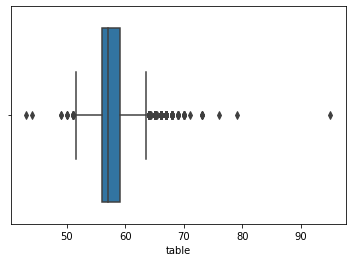

In [28]:
sns.boxplot(x=df_diamonds["table"])

<AxesSubplot:xlabel='x'>

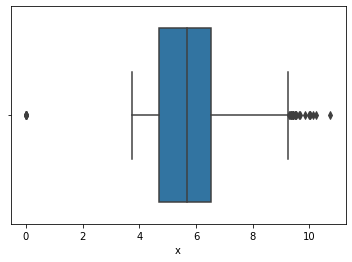

In [29]:
sns.boxplot(x=df_diamonds["x"])

<AxesSubplot:xlabel='y'>

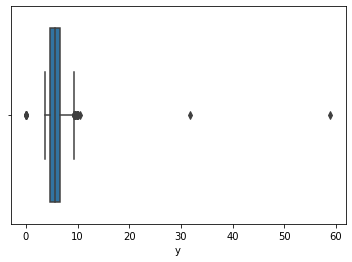

In [30]:
sns.boxplot(x=df_diamonds["y"])

<AxesSubplot:xlabel='z'>

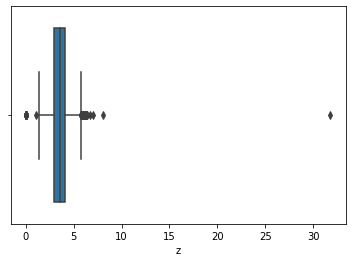

In [31]:
sns.boxplot(x=df_diamonds["z"])

### BoxPlot by Class 

## Class Cut

<AxesSubplot:xlabel='cut', ylabel='count'>

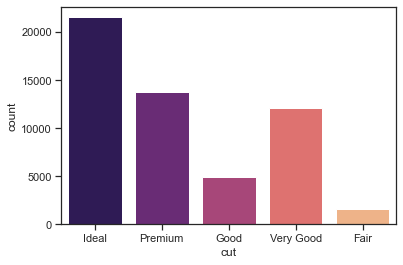

In [14]:
sns.countplot(x='cut',data=df_diamonds,palette="magma")

### Price

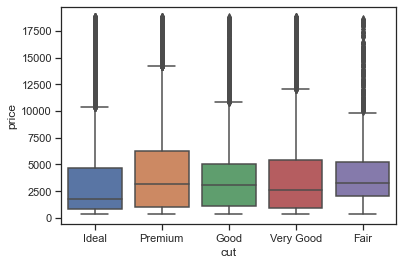

In [9]:
ax = sns.boxplot(x="cut", y="price", data=df_diamonds)

### Carat

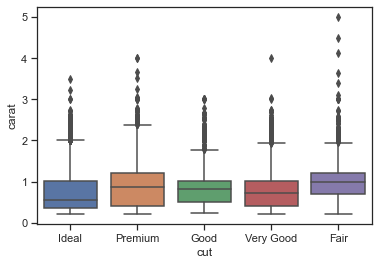

In [10]:
ax = sns.boxplot(x="cut", y="carat", data=df_diamonds)

### Depth

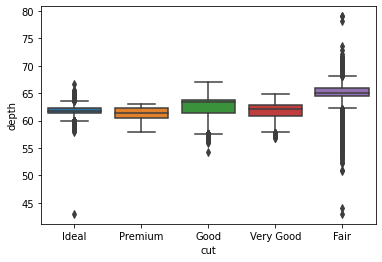

In [6]:
ax = sns.boxplot(x="cut", y="depth", data=df_diamonds)

## Table

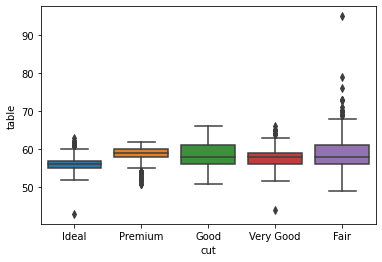

In [7]:
ax = sns.boxplot(x="cut", y="table", data=df_diamonds)

### X

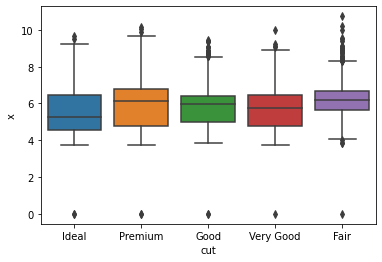

In [9]:
ax = sns.boxplot(x="cut", y="x", data=df_diamonds)

### Y

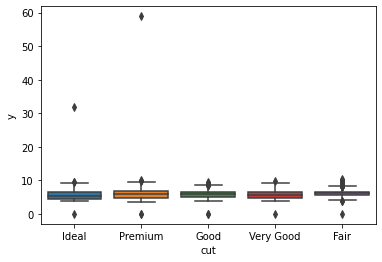

In [12]:
ax = sns.boxplot(x="cut", y="y", data=df_diamonds)

### Z

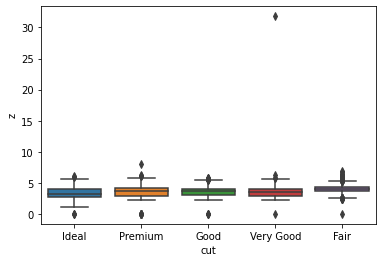

In [13]:
ax = sns.boxplot(x="cut", y="z", data=df_diamonds)

## Clarity

<AxesSubplot:xlabel='clarity', ylabel='count'>

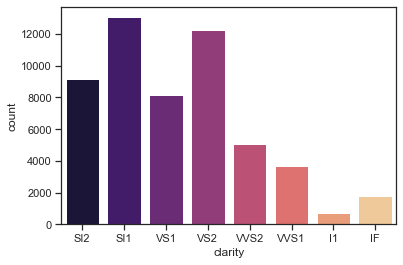

In [13]:
sns.countplot(x='clarity',data=df_diamonds,palette="magma")

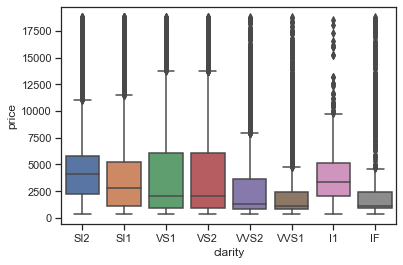

In [11]:
ax = sns.boxplot(x="clarity", y="price", data=df_diamonds)

In [ ]:
ax = sns.boxplot(x="cut", y="z", data=df_diamonds)

<AxesSubplot:xlabel='color', ylabel='count'>

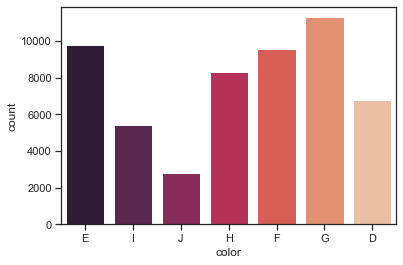

In [15]:
sns.countplot(x='color',data=df_diamonds,palette="rocket")

In [ ]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='price', y='carat', hue='cut', data=df_diamonds)

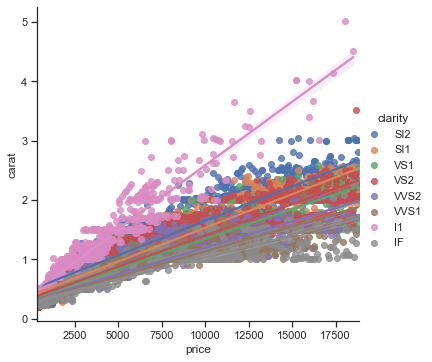

In [18]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='price', y='carat', hue='clarity', data=df_diamonds)

In [ ]:
g = sns.PairGrid(df_diamonds)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

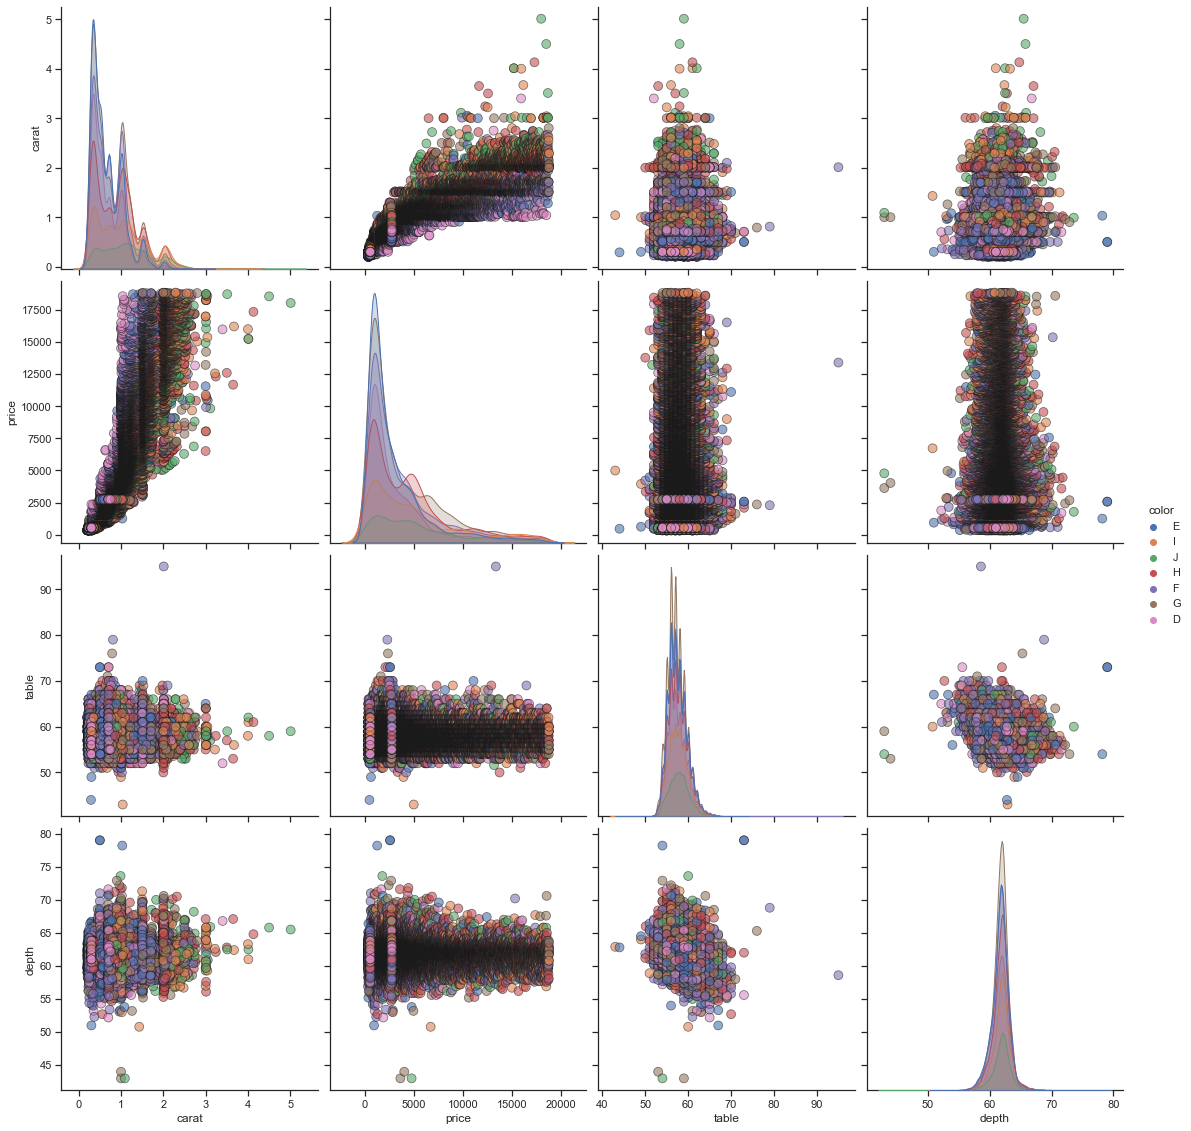

In [16]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_diamonds, 
             vars = ['carat', 'price', 'table','depth'], 
             hue = 'color', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);


### Heatmap

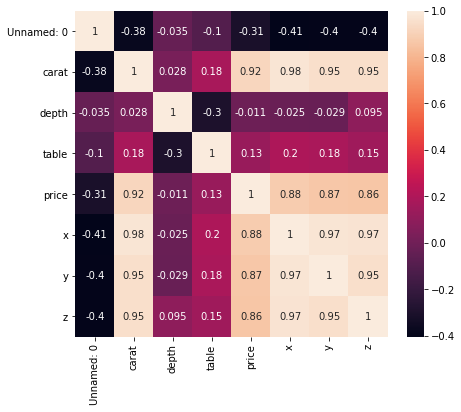

In [34]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
sns.heatmap(correlation, annot=True)
plt.show()

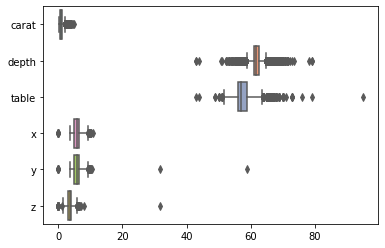

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


usecols = ["carat","depth","table","x","y","z","cut"]
df_diamonds = pd.read_csv('datasets/diamonds.csv',usecols=usecols)
ax = sns.boxplot(data=df_diamonds, orient="h", palette="Set2")

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
usecols = ["carat","depth","table","x","y","z","price"]
df_diamonds = pd.read_csv('datasets/diamonds.csv',usecols=usecols)
df_diamonds = scaler.fit_transform(df_diamonds)


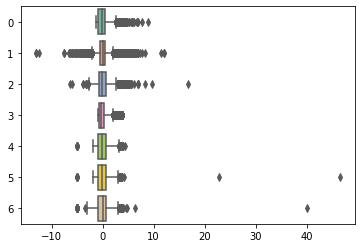